In [ ]:
#  network structure
# 2 input unit (a bias plus one input data)
# 2 hidden layer units with tanhal activaion function
# 1 output layer unit with linear activation function
#
# the desired output is an array r 
# use 2 dimensinal vector

# counting weight coefficients
# 2 v coefficient  coming from 2 hidden unit to output
#  v_1, v_2 
# 4 w coefficeint coming from 2 input unit to 2 hidden units
#  w_z1[m]  w_z2[m]    m running from 0 to 1 
# use tanhal activation function for hidden unit
# the ouput unit is linear (no tanhal function is used)

# choose learning rate to be 0.05
# in the end, the neural network fit the function well after 1000 epoch
# here I used 27 sample, so the total number of iteration = 27* number of epoch or 27000
# 
# I have masked v3 or z1 or w_z3
# if you want, you can go to these lines and unmask them
# from these lines, you can even add more neural by adding more varibles



import random
from random import randrange
from math import *

def tanh(x):
    return exp(x)-exp(-x)/(exp(x)+exp(-x))
w_z1=[0,0]
w_z2=[0,0]
#w_z3=[0,0]

#initialize weight coefficients
for i in range(2):
    w_z1[i]=random.uniform(-0.1,0.1)
    w_z2[i]=random.uniform(-0.1,0.1)
   # w_z3[i]=random.uniform(-0.1,0.1) 
v_1=random.uniform(-0.1,0.1)
v_2=random.uniform(-0.1,0.1)
#v_3=random.uniform(-0.1,0.1)
v_0=random.uniform(-0.1,0.1) # adding bias term for v
              
eta=0.05 #define learning rate

# repurpose the input vector
# the first element is bias unit
# the second is the input x
# target function f(x)= sin 6x from Alpaydin'book 


# set the rest of element to be zero
x = [ [1,0.0], [1,0.0], [1,0.0], \
      [1,0.0], [1,0.0], [1,0.0], \
      [1,0.0], [1,0.0], [1,0.0],
      [1,0.0], [1,0.0], [1,0.0], \
      [1,0.0], [1,0.0], [1,0.0], \
      [1,0.0], [1,0.0], [1,0.0],
      [1,0.0], [1,0.0], [1,0.0], \
      [1,0.0], [1,0.0], [1,0.0], \
      [1,0.0], [1,0.0], [1,0.0]

      ]

# desired output array
r= [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0, \
    0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0, \
    0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
    ]

for i in range(27):
    x1= random.uniform(-0.5,0.5)
    x[i][1]=x1
    y=sin(6*x1)+random.gauss(0,0.1)
    r[i]=y
    
for i in range(27000):
    j= randrange(27) #randomly pick sample vector of out of 8  
    desiredoutput=r[j]
    sum_w_z1=0
    sum_w_z2=0
    #sum_w_z3=0
    sum_v=0 
    for k in range(2): 
        sum_w_z1=sum_w_z1+ w_z1[k]*x[j][k]
        sum_w_z2=sum_w_z2+ w_z2[k]*x[j][k]
        #sum_w_z3=sum_w_z3+ w_z3[k]*x[j][k]
    z1_h=tanh(sum_w_z1)
    z2_h=tanh(sum_w_z2)
    #z3_h=tanh(sum_w_z3)
    sum_v=v_1*z1_h+v_2*z2_h+v_0 #keep only two hidden unit
      
    output_y= sum_v  #use linear unit as output

    
#delta rule
    # weight update Ethm Alpaydin' pseudo code
    # update= learning rate*(Desired output - Actualouput)*input
    v_1=v_1-eta*(output_y-desiredoutput)*z1_h  
    v_2=v_2-eta*(output_y-desiredoutput)*z2_h
    #v_3=v_3-eta*(output_y-desiredoutput)*z3_h
    v_0=v_0-eta*(output_y-desiredoutput)*1
    
    for m in range(2):
        # weight update Ethm Alpaydin' pseudo code
        # update= learning rate *v*z(1-z)*(Desired output - Actualouput)*input
    
        w_z1[m]=w_z1[m]-eta*v_1*(1-z1_h**2)*(output_y-desiredoutput)*x[j][m]
        w_z2[m]=w_z2[m]-eta*v_2*(1-z2_h**2)*(output_y-desiredoutput)*x[j][m]
        #w_z3[m]=w_z3[m]-eta*v_3*(1-z3_h**2)*(output_y-desiredoutput)*x[j][m]

for j in range(27):
    desiredoutput = r[j]
    sum_w_z1=0
    sum_w_z2=0
    #sum_w_z3=0
    sum_v=0 
    for k in range(2): 
        sum_w_z1=sum_w_z1+ w_z1[k]*x[j][k]
        sum_w_z2=sum_w_z2+ w_z2[k]*x[j][k]
      #  sum_w_z3=sum_w_z3+ w_z3[k]*x[j][k]
    z1_h=tanh(sum_w_z1)
    z2_h=tanh(sum_w_z2)
    #z3_h=tanh(sum_w_z3)
   
    sum_v=v_1*z1_h+v_2*z2_h+v_0
    output_y= sum_v
    
    print('input x',round(x[j][1],3), 'desiredoutput', round(desiredoutput,3),'actualoutput', round(output_y,3))
# in total, this newtork has 7 coefficient, namely 3 v coefficents and 4 w cofficients 
print('v0', round(v_0,3), 'v1', round(v_1,3), 'v2', round(v_2,3))
print('wz1_0_bias', round(w_z1[0],3), 'wz1_1', round(w_z1[1],3), 'wz2_0_bias', round(w_z2[0],3),'wz2_1', round(w_z2[1],3))


input x 0.329 desiredoutput 0.962 actualoutput 0.502
input x -0.134 desiredoutput -0.579 actualoutput 0.104
input x 0.12 desiredoutput 0.72 actualoutput 0.429
input x 0.04 desiredoutput 0.199 actualoutput 0.368
input x 0.0 desiredoutput -0.224 actualoutput 0.327
input x 0.12 desiredoutput 0.642 actualoutput 0.429
input x 0.062 desiredoutput 0.315 actualoutput 0.388
input x -0.475 desiredoutput -0.07 actualoutput -1.245
input x -0.297 desiredoutput -0.879 actualoutput -0.357
input x 0.448 desiredoutput 0.413 actualoutput 0.518
input x 0.407 desiredoutput 0.673 actualoutput 0.513
input x 0.356 desiredoutput 0.854 actualoutput 0.506
input x -0.003 desiredoutput -0.165 actualoutput 0.323
input x -0.369 desiredoutput -0.735 actualoutput -0.646
input x 0.176 desiredoutput 0.855 actualoutput 0.457
input x 0.344 desiredoutput 1.095 actualoutput 0.504
input x 0.133 desiredoutput 0.747 actualoutput 0.437
input x 0.257 desiredoutput 0.933 actualoutput 0.485
input x 0.086 desiredoutput 0.664 actua

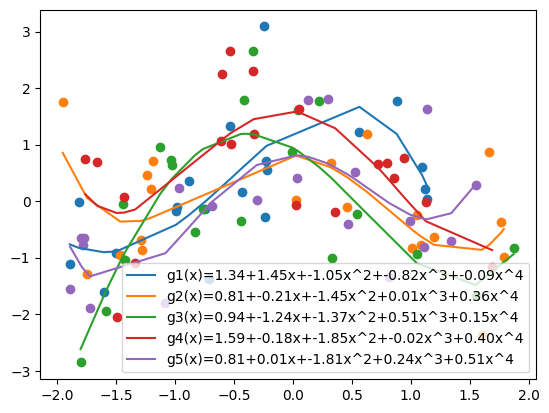

Average coefficients: [ 1.09999458 -0.03426512 -1.5079065  -0.01733107  0.26640015]


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import cos

# Define the target function
def target_function(x):
    return cos(1.5*x)

# Define the noisy function
def noisy_function(x):
    return target_function(x) + np.random.normal(0, 1)

# Generate 5 data sets, each with 20 data points
datasets = []
for i in range(5):
    x_values = np.random.uniform(-2, 2, 20)
    y_values = [noisy_function(x) for x in x_values]
    datasets.append((x_values, y_values))

# Define the 4th order polynomial function
def poly_4th_order(x, w0, w1, w2, w3, w4):
    return w0 + w1*x + w2*x**2 + w3*x**3 + w4*x**4

# Fit the 4th order polynomial to each data set
coefficients = []
for i, dataset in enumerate(datasets):
    x_values, y_values = dataset
    popt, pcov = curve_fit(poly_4th_order, x_values, y_values)
    coefficients.append(popt)
    plt.scatter(x_values, y_values)
    plt.plot(np.sort(x_values), poly_4th_order(np.sort(x_values), *popt), label=f'g{i+1}(x)={popt[0]:.2f}+{popt[1]:.2f}x+{popt[2]:.2f}x^2+{popt[3]:.2f}x^3+{popt[4]:.2f}x^4')
plt.legend()
plt.show()

# Compute the average coefficients
average_coefficients = np.mean(coefficients, axis=0)
print(f"Average coefficients: {average_coefficients}")


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import cos

# Generate 5 data sets, each with 20 data points

df = pd.DataFrame(columns=['set', 'x', 'y'])
for i in range(5):
  for j in range(20):
    x = random.uniform(-2, 2)
    y = cos(1.5*x) + random.gauss(0, 1)
    df = df.append({"set": i+1 , "x":round(x, 4), "y":round(y, 4)},ignore_index=True)

df.to_csv('/content/drive/MyDrive/HW7_2.csv', index=False)